# Least Squares Methodologies with Python

In this notebook we will go over an example of how to perform Ordinary Least Squares regression (single x + y).

As usual we start by importing the data.

In [5]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [6]:
X=pd.Series([19,23,20,24,21,26,20,25,22,29],name="MTemp")
Y=pd.Series([294,344,360,417,359,422,333,443,350,401],name="NPts")

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Max. Temperature')

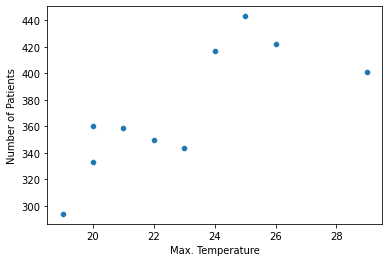

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(X,Y)
plt.ylabel("Number of Patients")
plt.xlabel("Max. Temperature")

## Least Squares Regression with a Single Variable

In our data set we have y as the dependent variable, and x as the independent variable. We will first analyze how our model performs using just the x variable to predict y (regress y on x).

Regression models can be built in python using the `from statsmodels.formula.api` library, which contains an `ols` class. The ols class takes as input a DataFrame as well as a string expression indicating which form the regression model should take based on the column names of the dataframe. The general format is "dependent_var_col_name ~ independent_var1_col_name + independent_var2_col_name + ...". 

In [8]:
from statsmodels.formula.api import ols

DF=pd.concat([X,Y],axis='columns')
print(DF)

   MTemp  NPts
0     19   294
1     23   344
2     20   360
3     24   417
4     21   359
5     26   422
6     20   333
7     25   443
8     22   350
9     29   401


In [9]:
model1=ols('Y~X',data=DF)
results1=model1.fit()

In the above example we are building a model to predict Y (the dependent variable) based on the values of x (the independent variable). The `ols` command create the ols model object while the `.fit()` command computes the regression model and returns the model results. Let's see what's contained in the results of the model.

In [10]:
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 17 Jun 2022   Prob (F-statistic):            0.00830
Time:                        09:45:32   Log-Likelihood:                -47.480
No. Observations:                  10   AIC:                             98.96
Df Residuals:                       8   BIC:                             99.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    108.4477     76.430      1.419      0.1

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Another way to do this is directly through the OLS class, where you have to specify to add the constant for the model fit.

In [11]:
import statsmodels.api as sm

X=sm.add_constant(X)
model2 = sm.OLS(Y,X)
results2=model2.fit()

In [12]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   NPts   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 17 Jun 2022   Prob (F-statistic):            0.00830
Time:                        09:45:35   Log-Likelihood:                -47.480
No. Observations:                  10   AIC:                             98.96
Df Residuals:                       8   BIC:                             99.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.4477     76.430      1.419      0.1

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In this example:
* The intercept term (b0) = 108.45
* The slope term (b1) = 11.52 - this implies that on average a unit increase in x (Max Temp) results in an increase of y (number of Patients) of 11.52 people
* The t-value for the intercept term is -23.753 - Python calls this the t-value because it comes from the t-distribution.
* The 95% confidence interval for the slope term are \[3.89, 19.15\].
* The confidence interval do not cross zero meaning that zero is not a plausible value for the coefficients. x therefore significantly impacts the value of y.
* The $R^2$ value is 0.602


Let's investigate the results in more detail by checking the ANOVA table. ANOVA related methods can be found in the `statsmodels.stats.anova` library in the `anova_lm` class.

In [13]:
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(results1)
print(anova_results)

           df        sum_sq       mean_sq          F    PR(>F)
X         1.0  11801.917773  11801.917773  12.119786  0.008303
Residual  8.0   7790.182227    973.772778        NaN       NaN


A key additional piece of information we haven't got yet is the standard error of the model. The `scale` parameter of the model results provides the mean squared error. The square root of this value is the standard error.

In [14]:
mean_squared_error = results1.scale
print("The model mean squared error is: " +str(mean_squared_error))
print("The model standard error is: " + str(np.sqrt(mean_squared_error)))

The model mean squared error is: 973.7727784027002
The model standard error is: 31.205332531519357


Lastly, in order to use the model, we want to get the model coefficients without having to hard code the values. They are contained inside the model results.

In [15]:
coefficients = results1._results.params
print(coefficients)

[108.44769404  11.52193476]


The alternate way to build linear regression models may be syntactically cleaner. This can be found in the `OLS` class in the `statsmodels.api` library. The drawback to this 'cleaner' method is that it doesn't provide convenient access to the model's ANOVA table. In cases where the ANOVA results aren't needed it may provide a cleaner solution.

Again, by default this version DOES NOT include an intercept term. The intercept term needs to be added manually via the `add_constant` method.

Finally, we will plot the regression line on the scatterplot

Text(20, 420, '$\\hat{y}$=108.45+11.52x')

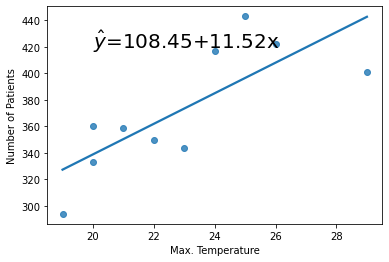

In [16]:
#regplot() plots data and a linear regression line or can use lmplot to help in conditioning on other variables
ax=sns.regplot(x='MTemp',y='NPts',data=DF,ci=None)
plt.ylabel("Number of Patients")
plt.xlabel("Max. Temperature")
ax.annotate(text='$\hat{y}$=108.45+11.52x',xy=(20,420),xycoords='data',size=20)

Looking at how to calculate and plot the predcition and the resdiuals based on the model.

In [24]:
X1=pd.Series([19,23,20,24,21,26,20,25,22,29],name="MTemp")
Y1=pd.Series([294,344,360,417,359,422,333,443,350,401],name="NPts")

In [27]:
# Calculate the predictions and errors (residuals) based on the model
y_pred=108.45+11.52*X1
y_value=Y1
error=y_value-y_pred
print(y_pred)
print(error)

0    327.33
1    373.41
2    338.85
3    384.93
4    350.37
5    407.97
6    338.85
7    396.45
8    361.89
9    442.53
Name: MTemp, dtype: float64
0   -33.33
1   -29.41
2    21.15
3    32.07
4     8.63
5    14.03
6    -5.85
7    46.55
8   -11.89
9   -41.53
dtype: float64


C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(20, 420, '$\\hat{y}$=108.45+11.52x')

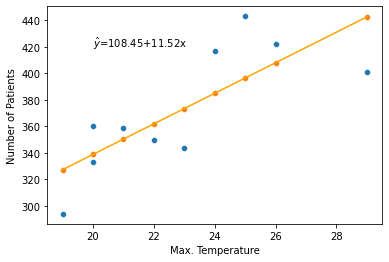

In [28]:
ax=sns.scatterplot(X1,Y1)
plt.ylabel("Number of Patients")
plt.xlabel("Max. Temperature")
ax=sns.scatterplot(X1,y_pred)
ax=sns.lineplot(X1,y_pred,color='orange')
ax.annotate(text='$\hat{y}$=108.45+11.52x',xy=(20,420),
	xycoords='data',size=10)

C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'error')

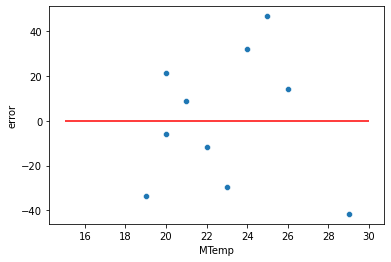

In [31]:
sns.scatterplot(X1,error)
plt.hlines(0,15,30,color='red')
plt.ylabel("error")